<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/BoostingRFDTRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import lightgbm as lgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import matplotlib.pyplot as plt

In [12]:
import warnings
warnings.filterwarnings("ignore")
boston = load_boston()
x, y = boston.data, boston.target
x_df = DataFrame(x, columns= boston.feature_names)
X_train, X_test, y_train, y_test = train_test_split(x_df, y, test_size=0.15)


In [14]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [15]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [34]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=17)
dtr.fit(X_train,y_train)
## Predicting for training data
print('Train Data')
y_pred = dtr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = dtr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 0.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0
R-Squared: 1.0
Test Data
MSE: 14.348947368421053
RMSE: 3.788000444617325
MAE: 2.7973684210526315
MAPE: 15.058943212409833
R-Squared: 0.8444779092425767
CPU times: user 17 ms, sys: 2.13 ms, total: 19.1 ms
Wall time: 19.8 ms


In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=17)
rfr.fit(X_train,y_train)
## Predicting for training data
print('Train Data')
y_pred = rfr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = rfr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 1.8626067906976729
RMSE: 1.3647735309192046
MAE: 0.8463395348837196
MAPE: 4.216574648128385
R-Squared: 0.9775508571493979
Test Data
MSE: 9.298746973684201
RMSE: 3.0493846877172124
MAE: 2.2698684210526316
MAPE: 12.244063471377464
R-Squared: 0.8992148668720943


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from time import time

gbr = GradientBoostingRegressor(random_state=17)
gbr.fit(X_train, y_train)
print('Train Data')
y_pred = gbr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = gbr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 1.9234426186677969
RMSE: 1.3868823377157116
MAE: 1.095681766233656
MAPE: 5.739671481138995
R-Squared: 0.9768176308993076
Test Data
MSE: 7.15399359516127
RMSE: 2.6746950471336484
MAE: 2.1084638702162963
MAPE: 11.277437634909633
R-Squared: 0.9224609295289983


In [19]:
# fit model no training data
from xgboost import XGBRegressor
xgr = XGBRegressor(random_state=17)
xgr.fit(X_train, y_train)
print('Train Data')
y_pred = xgr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = xgr.predict(X_test)
evalmetric(y_test,y_pred2)

[16:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Data
MSE: 2.405069377779513
RMSE: 1.5508286100596393
MAE: 1.1900774687389994
MAPE: 6.20740535816278
R-Squared: 0.9710128051196691
Test Data
MSE: 7.55732487468885
RMSE: 2.7490589070969085
MAE: 2.1260115573280736
MAPE: 11.224270306268691
R-Squared: 0.9180893946526459


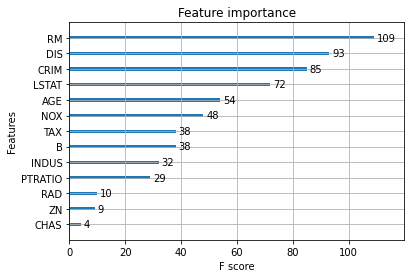

In [32]:
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
plot_importance(xgr)
pyplot.show()

In [21]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.4 MB/s eta 0:00:00


In [ ]:
import catboost as cb
cat = cb.CatBoostRegressor(random_state=17)
cat.fit(X_train, y_train)
print('Train Data')
y_predcat = cat.predict(X_train)
evalmetric(y_train,y_predcat)
print('Test Data')
y_predcat2 = xgr.predict(X_test)
evalmetric(y_test,y_predcat2)

In [20]:
from time import time
import lightgbm as lgb
t0 = time()
lgr = lgb.LGBMRegressor(random_state=17)
lgr.fit(X_train, y_train)
print('Train Data')
y_pred = lgr.predict(X_train)
evalmetric(y_train,y_pred)
print('Test Data')
y_pred2 = lgr.predict(X_test)
evalmetric(y_test,y_pred2)

Train Data
MSE: 2.3501249840589757
RMSE: 1.5330117364387579
MAE: 0.8869023885085783
MAPE: 4.349288816944054
R-Squared: 0.9716750246228044
Test Data
MSE: 11.728085800570659
RMSE: 3.4246292938901663
MAE: 2.3651123714725726
MAPE: 11.760375350632831
R-Squared: 0.8728843045099338
